In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load dataset
df = pd.read_csv('telescope_data.csv')

# Remove null and na values
df.dropna(inplace=True)

print(df.head())

   Unnamed: 0   fLength    fWidth   fSize  ...  fM3Trans   fAlpha     fDist  class
0           0   28.7967   16.0021  2.6449  ...   -8.2027  40.0920   81.8828      g
1           1   31.6036   11.7235  2.5185  ...   -9.9574   6.3609  205.2610      g
2           2  162.0520  136.0310  4.0612  ...  -45.2160  76.9600  256.7880      g
3           3   23.8172    9.5728  2.3385  ...   -7.1513  10.4490  116.7370      g
4           4   75.1362   30.9205  3.1611  ...   21.8393   4.6480  356.4620      g

[5 rows x 12 columns]


In [25]:
# Extract class column / extract the class classes
classes = df['class']
data_matrix = df.drop(columns='class')
print(data_matrix)

       Unnamed: 0   fLength    fWidth  ...  fM3Trans   fAlpha     fDist
0               0   28.7967   16.0021  ...   -8.2027  40.0920   81.8828
1               1   31.6036   11.7235  ...   -9.9574   6.3609  205.2610
2               2  162.0520  136.0310  ...  -45.2160  76.9600  256.7880
3               3   23.8172    9.5728  ...   -7.1513  10.4490  116.7370
4               4   75.1362   30.9205  ...   21.8393   4.6480  356.4620
...           ...       ...       ...  ...       ...      ...       ...
19015       19015   21.3846   10.9170  ...    2.8766   2.4229  106.8258
19016       19016   28.9452    6.7020  ...   -2.9632  86.7975  247.4560
19017       19017   75.4455   47.5305  ...   -9.4662  30.2987  256.5166
19018       19018  120.5135   76.9018  ...  -63.8389  84.6874  408.3166
19019       19019  187.1814   53.0014  ...   31.4755  52.7310  272.3174

[19020 rows x 11 columns]


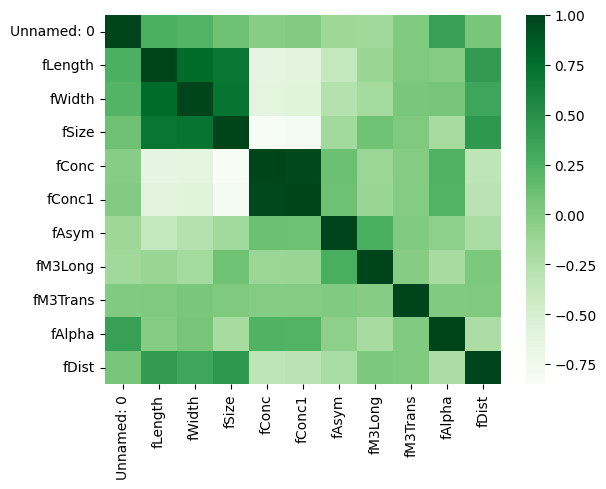

In [26]:
# Create a correlation matrix
# menggunakan metode .corr() pada data_matrix untuk mendapatkan correlation matrix
correlation_matrix = data_matrix.corr()

#plot
ax = plt.axes()
sns.heatmap(correlation_matrix, cmap='Greens', ax=ax)
plt.show()

In [27]:
# Perform eigendecomposition
# perform eigendecomposition menggunakan np.linalg.eig
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
print(f'Eigenvalues length: {eigenvalues.size}, Original Number of Features: {data_matrix.shape[1]}')

# Order the eigenvalues by ordering the indices of the eigenvalues using 'argsort', and use [::-1] to order them from greatest to smallest
indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[indices]
eigenvectors = eigenvectors[:, indices]
print(eigenvalues.shape, eigenvectors.shape)

Eigenvalues length: 11, Original Number of Features: 11
(11,) (11, 11)


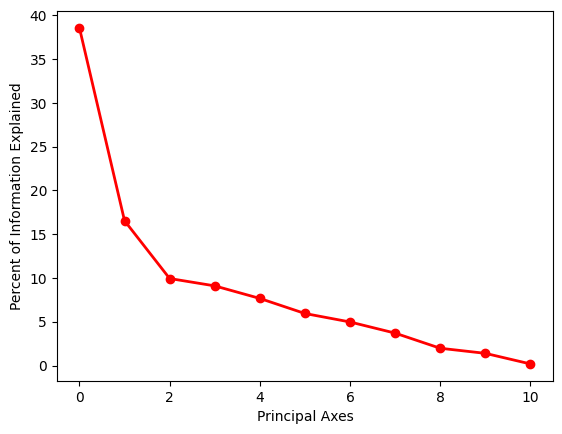

In [28]:
# Find the variance or information percentages for each eigenvalue.
# Find the percentages of information for each eigenvector, which is generated by the proportion of its eigenvalues to the sum of all eigenvalues
information_proportions = eigenvalues / eigenvalues.sum()
information_percents = information_proportions * 100

# Plot the principal axes vs the information proportions for each principal axis
plt.figure()
plt.plot(information_percents, 'ro-', linewidth=2)
plt.xlabel('Principal Axes')
plt.ylabel('Percent of Information Explained')
plt.show()

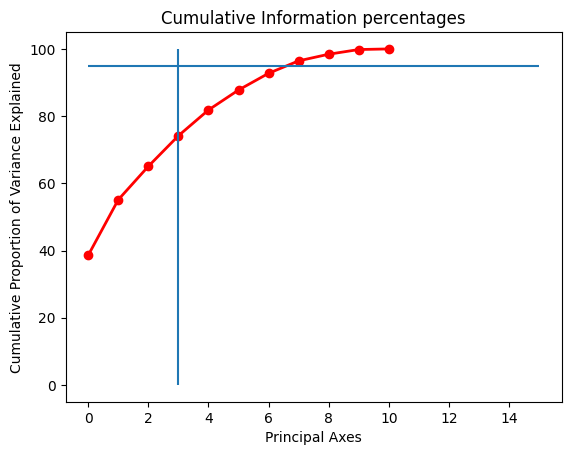

In [29]:
#Find the cumulative variance/information percentages for each eigenvalue.
# Find the cumulative sum of the percentages
cumulative_information_percents = np.cumsum(information_percents)

#Plot the cumulative percentages array
plt.figure()
plt.plot(cumulative_information_percents, 'ro-', linewidth=2)

# Also plot a horizontal line indicating the 95% mark, and a vertical line for the third principal axis
plt.hlines(y=95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=100)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()


**Peforming PCA**

In [30]:
# Calculate the mean of each column
mean = data_matrix.mean(axis=0)

# Calculate the standard deviation of each column
std = data_matrix.std(axis=0)

# Standardize the data matrix
standardized_data_matrix = (data_matrix - mean) / std

# Print to verify
print("Standardized Data Matrix:")
print(standardized_data_matrix.head())

Standardized Data Matrix:
   Unnamed: 0   fLength    fWidth  ...  fM3Trans    fAlpha     fDist
0   -1.731914 -0.577211 -0.336795  ... -0.405831  0.476803 -1.497826
1   -1.731732 -0.510955 -0.570012  ... -0.490081 -0.815397  0.153121
2   -1.731550  2.568210  6.205695  ... -2.182972  1.889174  0.842613
3   -1.731368 -0.694749 -0.687241  ... -0.355350 -0.658786 -1.031436
4   -1.731186  0.516609  0.476371  ...  1.036593 -0.881016  2.176369

[5 rows x 11 columns]


In [31]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit and transform the standardized data matrix
pca_result = pca.fit_transform(standardized_data_matrix)

# Print the resulting PCA transformed matrix
print("PCA Transformed Matrix:")
print(pca_result)

PCA Transformed Matrix:
[[-1.14752618 -1.01070531  0.44928579 ...  0.10793709  0.01429116
  -0.09711934]
 [-1.81750774 -1.31198425 -1.15376926 ...  0.04402253 -0.24530442
   0.41972072]
 [ 5.85666437  0.9070148   1.4722697  ... -1.24689557  0.87150221
   0.02138002]
 ...
 [ 2.88568767  0.36535366  1.19199515 ... -0.67979705  0.35293565
  -0.10433413]
 [ 4.80570314  2.84977495  0.66415526 ... -0.88959621 -0.14303434
   0.07863989]
 [ 3.53048733  4.63698946 -1.88077514 ...  1.03654932 -0.2277066
  -0.08457765]]


In [32]:
# Calculate eigenvalues from singular values
eigenvalues = pca.singular_values_ ** 2

# Extract eigenvectors
eigenvectors = pca.components_.T

# Print to verify
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[80691.46343959 34606.22856026 20799.17257641 19038.91339999
 16039.50992464 12438.40090514 10412.13796756  7749.77930717
  4131.63091491  2916.91907079   384.84393354]

Eigenvectors:
[[ 7.67722615e-02  4.86051165e-01  3.87106140e-01  4.55654040e-02
  -4.07913137e-01  1.02926581e-01 -6.48433196e-01 -1.54268375e-02
  -7.63638661e-02  4.89886003e-02 -3.31468460e-03]
 [ 4.11077117e-01  1.96910988e-01 -3.83353169e-02  1.65591045e-02
  -3.70316265e-02 -1.71003445e-02  8.64373518e-02  4.37506243e-01
   7.58506946e-01 -1.19703318e-01 -1.70089317e-02]
 [ 3.97461832e-01  2.09664728e-01  5.48664982e-02 -2.67690783e-02
   1.19168562e-01  1.20010288e-01  2.59828545e-01  5.01329750e-01
  -5.07898905e-01  4.34505308e-01  1.16494973e-02]
 [ 4.47060247e-01 -8.77446491e-02  1.01906055e-01  5.39427911e-03
   1.54241550e-02  2.13133879e-02  2.24485643e-02  1.30633742e-03
  -3.46144288e-01 -8.05929151e-01 -1.07184871e-01]
 [-4.37852526e-01  1.81666646e-01 -1.51315965e-01 -6.26462666e-03
  -1.

In [33]:
# Extract variance ratios
variance_ratios = pca.explained_variance_ratio_

# Print to verify
print("Variance Ratios:")
print(variance_ratios)

Variance Ratios:
[0.38569786 0.16541463 0.09941815 0.09100428 0.0766674  0.05945443
 0.04976907 0.03704324 0.01974882 0.01394261 0.00183952]


In [34]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 principal axes
pca = PCA(n_components=2)

# Fit and transform the standardized data matrix
pca_result_2d = pca.fit_transform(standardized_data_matrix)

# Print the resulting PCA transformed matrix
print("PCA Transformed Matrix with 2 Principal Axes:")
print(pca_result_2d)

PCA Transformed Matrix with 2 Principal Axes:
[[-1.14752618 -1.01070531]
 [-1.81750774 -1.31198425]
 [ 5.85666437  0.9070148 ]
 ...
 [ 2.88568767  0.36535366]
 [ 4.80570314  2.84977495]
 [ 3.53048733  4.63698946]]


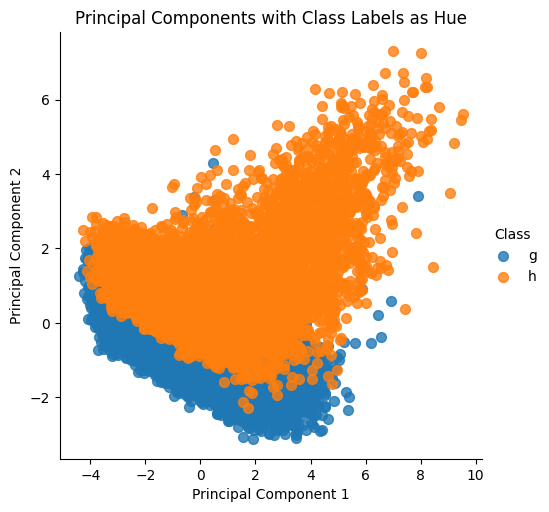

In [35]:
# Create a DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': pca_result_2d[:, 0],
    'PC2': pca_result_2d[:, 1],
    'Class': classes  # Assuming 'classes' contains the class labels
})

# Plot the principal components with class labels as hue
sns.lmplot(data=pca_df, x='PC1', y='PC2', hue='Class', fit_reg=False, scatter_kws={'s': 50})
plt.title('Principal Components with Class Labels as Hue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the PCA transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pca_result_2d, classes, test_size=0.2, random_state=42)

# Initialize SVC classifier
svc_1 = SVC()

# Fit the transformed features onto the classifier
svc_1.fit(X_train, y_train)

# Generate score
score = svc_1.score(X_test, y_test)

# Print the score
print("Score:", score)

Score: 0.8780231335436383


In [37]:
# Select the first two features from the standardized data matrix
X_train_original = standardized_data_matrix.iloc[:, :2]

# Split the original data into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_train_original, classes, test_size=0.2, random_state=42)

# Initialize SVC classifier for original data
svc_2 = SVC()

# Fit the original features onto the classifier
svc_2.fit(X_train_orig, y_train_orig)

# Generate score for original data
score_orig = svc_2.score(X_test_orig, y_test_orig)

# Print the score for original data
print("Score with original data features:", score_orig)


Score with original data features: 0.9976340694006309
